In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.stattools import coint
from scipy import stats as st
from statsmodels.tsa.seasonal import seasonal_decompose 

In [2]:
df=pd.read_csv("marketing_campaign.csv")

In [3]:
df.head()

Date Facebook Ad Campaign  Facebook Ad Views  Facebook Ad Clicks  \
0  1/1/2019             FB_Jan19               2116                  18   
1  1/2/2019             FB_Jan19               3106                  36   
2  1/3/2019             FB_Jan19               3105                  26   
3  1/4/2019             FB_Jan19               1107                  27   
4  1/5/2019             FB_Jan19               1317                  15   

   Facebook Ad Conversions Cost per Facebook Ad  \
0                        8                 $126   
1                       12                 $104   
2                        8                 $102   
3                        9                  $71   
4                        7                  $78   

  Facebook Click-Through Rate (Clicks / View)  \
0                                       0.83%   
1                                       1.15%   
2                                       0.84%   
3                                       2.45%   
4                                       1.10%   

  Facebook Conversion Rate (Conversions / Clicks)  \
0                                          42.73%   
1                                          34.04%   
2                                          31.45%   
3                                          34.76%   
4                                          47.59%   

  Facebook Cost per Click (Ad Cost / Clicks) AdWords Ad Campaign  \
0                                      $7.14            AW_Jan19   
1                                      $2.91            AW_Jan19   
2                                      $3.89            AW_Jan19   
3                                      $2.62            AW_Jan19   
4                                      $5.38            AW_Jan19   

   AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  \
0              4984                 59                       5   
1              4022                 71                       6   
2              3863                 44                       4   
3              3911                 49                       5   
4              4070                 55                       7   

  Cost per AdWords Ad AdWords Click-Through Rate (Clicks / View)  \
0                $194                                      1.18%   
1                 $75                                      1.77%   
2                $141                                      1.13%   
3                $141                                      1.26%   
4                $133                                      1.36%   

  AdWords Conversion Rate (Conversions / Click)  \
0                                         8.40%   
1                                         7.80%   
2                                         9.59%   
3                                        11.08%   
4                                        12.22%   

  AdWords Cost per Click (Ad Cost / Clicks)  
0                                     $3.30  
1                                     $1.05  
2                                     $3.23  
3                                     $2.86  
4                                     $2.40

In [4]:
df.describe()

Facebook Ad Views  Facebook Ad Clicks  Facebook Ad Conversions  \
count         365.000000          365.000000               365.000000   
mean         2179.687671           44.049315                11.742466   
std           618.074639           12.140559                 2.924786   
min          1050.000000           15.000000                 5.000000   
25%          1656.000000           35.000000                10.000000   
50%          2202.000000           43.000000                12.000000   
75%          2717.000000           54.000000                13.000000   
max          3320.000000           73.000000                19.000000   

       AdWords Ad Views  AdWords Ad Clicks  AdWords Ad Conversions  
count         365.00000         365.000000              365.000000  
mean         4717.19726          60.383562                5.980822  
std           561.11406          14.368225                1.628106  
min          3714.00000          31.000000                3.000000  
25%          4247.00000          49.000000                5.000000  
50%          4711.00000          60.000000                6.000000  
75%          5190.00000          73.000000                7.000000  
max          5760.00000          89.000000                9.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [6]:
df.shape

(365, 17)

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [9]:
c=['Date','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','AdWords Ad Views','AdWords Ad Clicks','AdWords Ad Conversions']
df1 = df[c]
df1

Date  Facebook Ad Views  Facebook Ad Clicks  \
0   2019-01-01               2116                  18   
1   2019-01-02               3106                  36   
2   2019-01-03               3105                  26   
3   2019-01-04               1107                  27   
4   2019-01-05               1317                  15   
..         ...                ...                 ...   
360 2019-12-27               3240                  51   
361 2019-12-28               1510                  69   
362 2019-12-29               2918                  44   
363 2019-12-30               2212                  37   
364 2019-12-31               1470                  60   

     Facebook Ad Conversions  AdWords Ad Views  AdWords Ad Clicks  \
0                          8              4984                 59   
1                         12              4022                 71   
2                          8              3863                 44   
3                          9              3911                 49   
4                          7              4070                 55   
..                       ...               ...                ...   
360                       13              5332                 72   
361                       18              3887                 49   
362                       13              5327                 62   
363                        8              4020                 71   
364                       17              4592                 47   

     AdWords Ad Conversions  
0                         5  
1                         6  
2                         4  
3                         5  
4                         7  
..                      ...  
360                       9  
361                       6  
362                       6  
363                       6  
364                       6  

[365 rows x 7 columns]

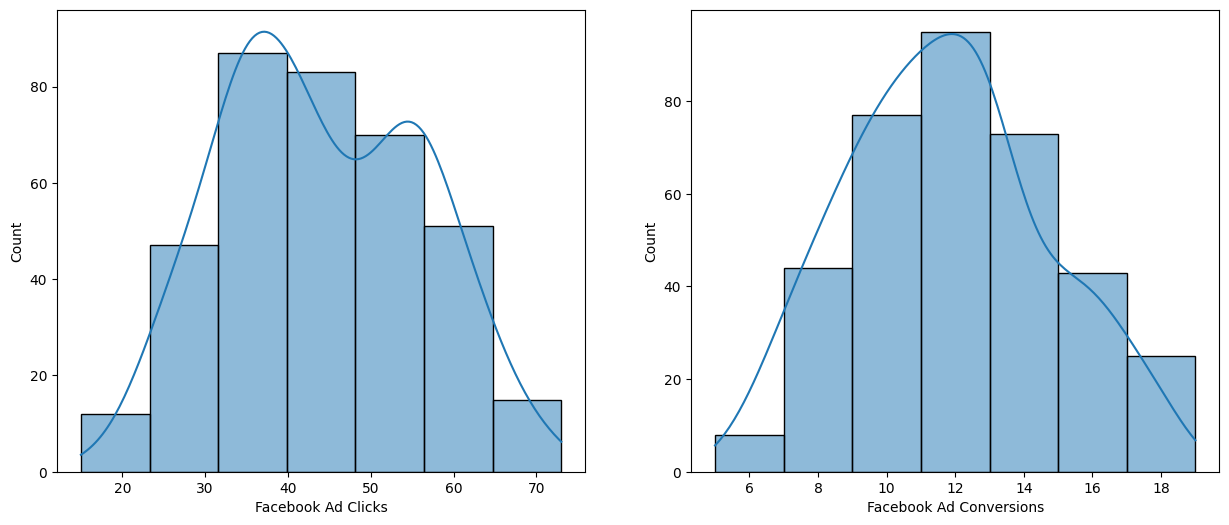

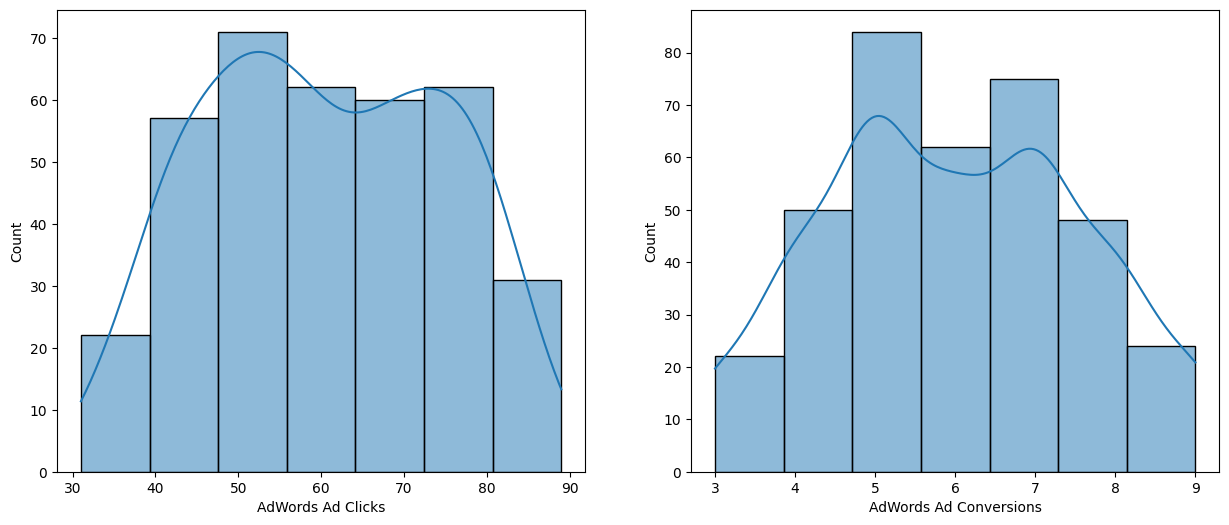

In [10]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(df["Facebook Ad Clicks"],bins=7,kde = True)
plt.subplot(1,2,2)
sns.histplot(df["Facebook Ad Conversions"],bins=7,kde = True)
plt.show()
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(df["AdWords Ad Clicks"],bins=7,kde = True)
plt.subplot(1,2,2)
sns.histplot(df["AdWords Ad Conversions"],bins=7,kde = True)
plt.show()

## finding the correletion between clicks and  conversions

In [11]:
fb_corr = df[['Facebook Ad Clicks','Facebook Ad Conversions']].corr()
fb_corr

Facebook Ad Clicks  Facebook Ad Conversions
Facebook Ad Clicks                 1.000000                 0.873775
Facebook Ad Conversions            0.873775                 1.000000

In [14]:
ad_corr = df[['AdWords Ad Clicks','AdWords Ad Conversions']].corr()
ad_corr

AdWords Ad Clicks  AdWords Ad Conversions
AdWords Ad Clicks                1.000000                0.447993
AdWords Ad Conversions           0.447993                1.000000

In [21]:
print("correletion coef__ ")
print("___________________")
print("Facebook :",round(fb_corr.values[0,1],2))
print("ADWord :",round(ad_corr.values[0,1],2))

correletion coef__ 
___________________
Facebook : 0.87
ADWord : 0.45


## Hence  we see facebook have better correletion between clicks and conversions then ADWord

### we can say facebook perform better than adword

## Hypothesis Tesing

In [33]:
print("Facebook :",round(df["Facebook Ad Conversions"].mean(),2))
print("ADWord :",round(df["AdWords Ad Conversions"].mean(),2))

t_stats,p_value = st.ttest_ind(a = df["Facebook Ad Conversions"],b = df["AdWords Ad Conversions"] ,equal_var=False)
print('\nttest :',t_stats,'\np-value :',p_value)
print("\n")
#comparing p value 
if p_value <0.05:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")
    

Facebook : 11.74
ADWord : 5.98

ttest : 32.88402060758184 
p-value : 9.348918164530465e-134


reject the null hypothesis


### let see the linearmodel on both

R2_Score : 76.34827765960227
MSE Score : 2.017713387008563


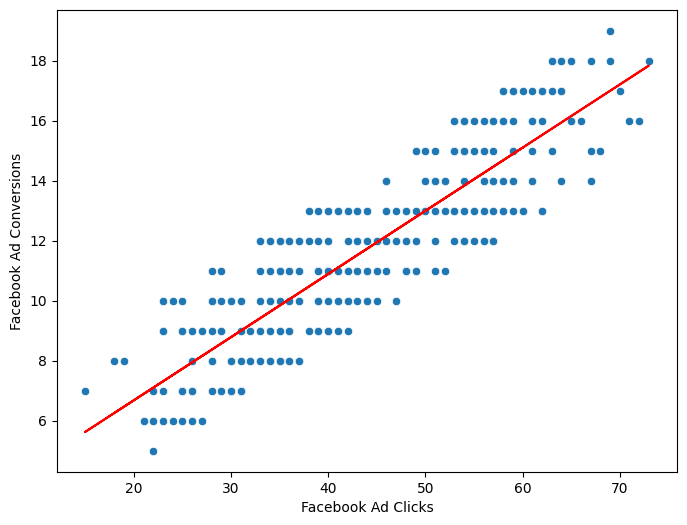

In [42]:
x = df[["Facebook Ad Clicks"]]
y = df[["Facebook Ad Conversions"]]
from sklearn.linear_model import LinearRegression
lr_fb = LinearRegression()
lr_fb.fit(x,y)
pred = lr_fb.predict(x)

plt.figure(figsize=(8,6))
sns.scatterplot(x =df["Facebook Ad Clicks"] ,y =df["Facebook Ad Conversions"])
plt.plot(df["Facebook Ad Clicks"],pred,color='r')

r2 = r2_score(y,pred)*100
mse = mean_squared_error(y,pred)
print("R2_Score :" ,r2)
print("MSE Score :", mse)

R2_Score : 20.069790809471833
MSE Score : 2.1129293564934093


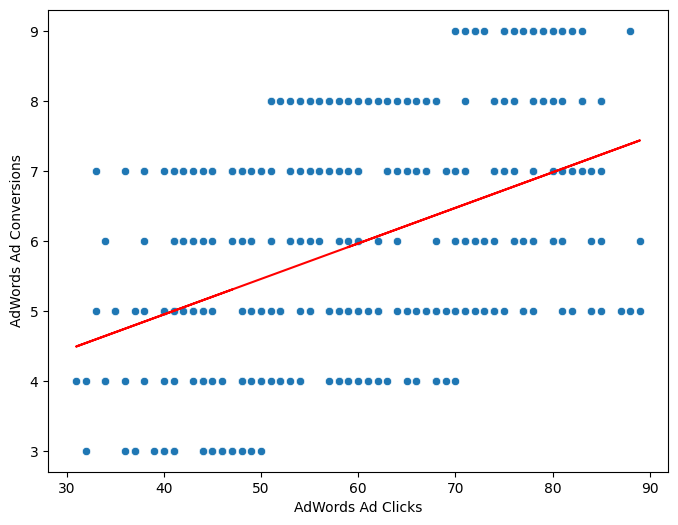

In [43]:
x = df[["AdWords Ad Clicks"]]
y = df[["AdWords Ad Conversions"]]
from sklearn.linear_model import LinearRegression
lr_ad = LinearRegression()
lr_ad.fit(x,y)
pred = lr_ad.predict(x)

plt.figure(figsize=(8,6))
sns.scatterplot(x =df["AdWords Ad Clicks"] ,y =df["AdWords Ad Conversions"])
plt.plot(df["AdWords Ad Clicks"],pred,color='r')

r2 = r2_score(y,pred)*100
mse = mean_squared_error(y,pred)
print("R2_Score :" ,r2)
print("MSE Score :", mse)

#  At the End we say Facebook perform better than ADWord